In [1]:
import ApproxPH
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
def rotate_diag(diag):
    new_diag = np.empty_like(diag)
    for i in range(len(diag[:,0])):
        new_diag[i,0] = diag[i,0]+diag[i,1]
        new_diag[i,1] = diag[i,1]-diag[i,0]
    return new_diag

def inverse_rotate(diag):
    new_diag = np.empty_like(diag)
    for i in range(len(diag[:,0])):
        new_diag[i,0] = 0.5*(diag[i,0]-diag[i,1])
        new_diag[i,1] = 0.5*(diag[i,1]+diag[i,0])
    return new_diag

def empirical_mean(diag_list):
    n = len(diag_list[0][:,0])
    mean_diag = np.array([[0.,0.]]*n)
    for i in range(n):
        vec = []
        for D in diag_list:
            vec.append(list(D[i,:]))
        mean_diag[i,:] = np.mean(np.array(vec),axis=0)
    return mean_diag

In [16]:
# torus
B = 20
num_points = 4000
cut_off = 0.3
D_list = np.array([[0,0]])
D_cut_list = np.array([[0,0]])
diag_list = []

for i in range(B):
    X_torus = ApproxPH.sample_torus(num_points, 0.8, 0.3)
    diag_torus = ApproxPH.get_PD(X_torus, min_persistence=0.1, max_edge_length=0.9)
    y = diag_torus[:,1]
    y[y==np.inf] = 0.9
    diag_torus[:,1] = y 
    D = rotate_diag(diag_torus)
    D_cut = D[D[:,1]>cut_off,:]
    if len(D_cut[:,0])==0:
        print("empty")
    diag_list.append(D_cut)
    D_list = np.vstack((D_list,D))
    D_cut_list = np.vstack((D_cut_list,D_cut))

D_list = np.delete(D_list, (0), axis=0)
D_cut_list = np.delete(D_cut_list, (0), axis=0)

mean_diag = empirical_mean(diag_list)
print(mean_diag)

[[0.58195575 0.46244606]
 [0.94247593 0.83507386]]


In [26]:
# circle
B = 50
num_points = 600
cut_off = 0.2
D_list = np.array([[0,0]])
D_cut_list = np.array([[0,0]])
diag_list = []

for i in range(B):
    X_ann = ApproxPH.sample_annulus(num_points, 0.5, 0.45)
    diag_ann = ApproxPH.get_PD(X_ann, min_persistence=0.1, max_edge_length=1)
    y = diag_ann[:,1]
    y[y==np.inf] = 1
    diag_ann[:,1] = y 
    D = rotate_diag(diag_ann)
    D_cut = D[D[:,1]>cut_off,:]
    if len(D_cut[:,0])==0:
        print("empty")
    diag_list.append(D_cut)
    D_list = np.vstack((D_list,D))
    D_cut_list = np.vstack((D_cut_list,D_cut))

D_list = np.delete(D_list, (0), axis=0)
D_cut_list = np.delete(D_cut_list, (0), axis=0)

mean_diag = empirical_mean(diag_list)
print(mean_diag)

[[0.89780653 0.81875557]]


In [27]:
print(inverse_rotate(mean_diag))

[[0.03952548 0.85828105]]


In [32]:
num_points = 700
cut_off = 0.3

def torus_variance(B):
    diag_list = []
    for i in range(B):
        X_torus = ApproxPH.sample_torus(num_points, 0.8, 0.3)
        diag_torus = ApproxPH.get_PD(X_torus, min_persistence=0.1, max_edge_length=0.9)
        y = diag_torus[:,1]
        y[y==np.inf] = 0.9
        diag_torus[:,1] = y 
        D = rotate_diag(diag_torus)
        D_cut = D[D[:,1]>cut_off,:]
        diag_list.append(D_cut)
    mean_diag = empirical_mean(diag_list)
    variance = 0
    for j in range(B):
        variance += np.linalg.norm(mean_diag[0,:]-diag_list[j][0,:])**2+np.linalg.norm(mean_diag[1,:]-diag_list[j][1,:])**2
    return variance

In [18]:
X_torus = ApproxPH.sample_torus(10000, 0.8, 0.3)
true_diag = ApproxPH.get_PD(X_torus, min_persistence=0.02, max_edge_length=0.9)
y = true_diag[:,1]
y[y==np.inf] = 0.9
true_diag[:,1] = y 
print(len(true_diag[:,0]))

480


In [25]:
X_ann = ApproxPH.sample_annulus(1000, 0.5, 0.45)
true_diag = ApproxPH.get_PD(X_ann, min_persistence=0.01, max_edge_length=1)
y = true_diag[:,1]
y[y==np.inf] = 1
true_diag[:,1] = y 
print(true_diag)

[[0.01807184 0.02927205]
 [0.01881091 0.03092102]
 [0.01814811 0.03162544]
 [0.02450987 0.03642962]
 [0.02269377 0.87538766]]


In [31]:
num_points = 600
cut_off = 0.2

def ann_variance(B):
    diag_list = []
    for i in range(B):
        X_ann = ApproxPH.sample_annulus(num_points, 0.5, 0.45)
        diag_ann = ApproxPH.get_PD(X_ann, min_persistence=0.1, max_edge_length=1)
        y = diag_ann[:,1]
        y[y==np.inf] = 1
        diag_ann[:,1] = y 
        D = rotate_diag(diag_ann)
        D_cut = D[D[:,1]>cut_off,:]
        diag_list.append(D_cut)
    mean_diag = empirical_mean(diag_list)
    variance = 0
    for j in range(B):
        variance += np.linalg.norm(mean_diag[0,:]-diag_list[j][0,:])**2
    return variance

In [35]:
B_list = [i for i in range(1,100)]
error_list = []
exp_repeat = 2
for B in B_list:
    er = 0
    for i in range(exp_repeat):
        er+=ann_variance(B)/B
    error_list.append(er/exp_repeat)

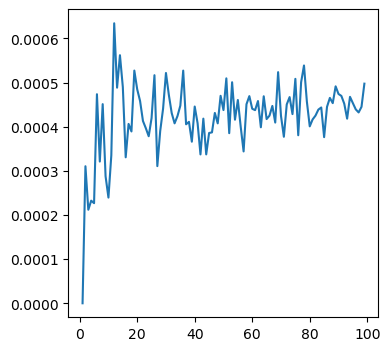

In [36]:
plt.figure(figsize=(4,4))
plt.plot(B_list,error_list)

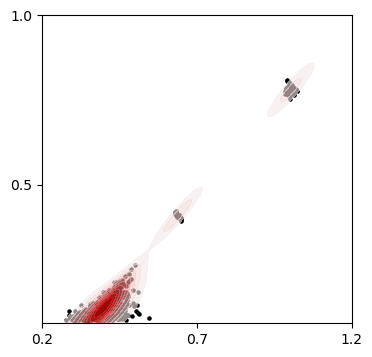

In [119]:
plt.figure(figsize=(4, 4))

plt.scatter(D_list[:,0],D_list[:,1],color="black",s=5)
cmap1 = sns.light_palette("red", as_cmap=True)
sns.kdeplot(x=D_list[:,0], y=D_list[:,1],bw_adjust=1,cmap=cmap1,multiple="fill",fill=True,alpha=0.6)
plt.axis([0.2,1.2,0.09,1])
plt.xticks([0.2,0.7,1.2])
plt.yticks([0.5,1])
plt.savefig("torus_with_diag.png",dpi=300)


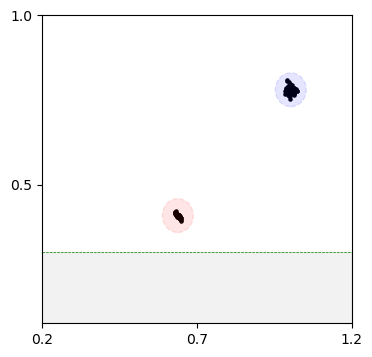

In [135]:
from matplotlib.patches import Circle

plt.figure(figsize=(4, 4))

plt.scatter(D_cut_list[:,0],D_cut_list[:,1],color="black",s=5)
#cmap1 = sns.light_palette("red", as_cmap=True)
#sns.kdeplot(x=D_list[:,0], y=D_list[:,1],bw_adjust=1,cmap=cmap1,multiple="fill",fill=True,alpha=0.6)
plt.axis([0.2,1.2,0.09,1])
plt.xticks([0.2,0.7,1.2])
plt.yticks([0.5,1])

x = D_cut_list[:,0]
cluster1 = D_cut_list[x<0.8,:]
cluster2 = D_cut_list[x>=0.8,:]

x_center1 = np.mean(cluster1[:, 0])
y_center1 = np.mean(cluster1[:, 1])
radius = 0.05  
circle = Circle((x_center1, y_center1), radius, linestyle='--', color='red', alpha=0.1)
plt.gca().add_patch(circle)

x_center2 = np.mean(cluster2[:, 0])
y_center2 = np.mean(cluster2[:, 1])
radius = 0.05  
circle = Circle((x_center2, y_center2), radius, linestyle='--', color='blue', alpha=0.1)
plt.gca().add_patch(circle)

plt.axhline(y=0.3, color='green', linestyle='--', linewidth=0.5)
    
# Fill the region below the line
plt.fill_betweenx(np.linspace(plt.gca().get_ylim()[0], 0.3, 100), plt.gca().get_xlim()[0], plt.gca().get_xlim()[1], color='gray', alpha=0.1)

plt.savefig("torus_without_diag.png",dpi=300)

In [5]:
# annulus
B = 60
num_points = 1000
cut_off = 0.3
D_list = np.array([[0,0]])
D_cut_list = np.array([[0,0]])

for i in range(B):
    X_torus = ApproxPH.sample_annulus(num_points, 0.8, 0.3)
    diag_torus = ApproxPH.get_PD(X_torus, min_persistence=0.1, max_edge_length=0.9)
    y = diag_torus[:,1]
    y[y==np.inf] = 0.9
    diag_torus[:,1] = y 
    D = rotate_diag(diag_torus)
    D_cut = D[D[:,1]>cut_off,:]
    D_list = np.vstack((D_list,D))
    D_cut_list = np.vstack((D_cut_list,D_cut))

D_list = np.delete(D_list, (0), axis=0)
D_cut_list = np.delete(D_cut_list, (0), axis=0)

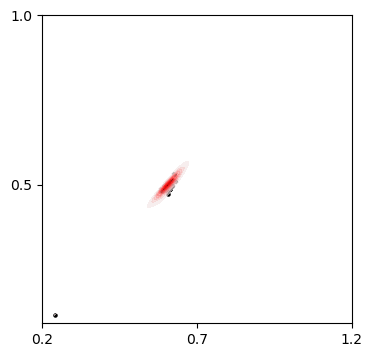

In [6]:
plt.figure(figsize=(4, 4))

plt.scatter(D_list[:,0],D_list[:,1],color="black",s=5)
cmap1 = sns.light_palette("red", as_cmap=True)
sns.kdeplot(x=D_list[:,0], y=D_list[:,1],bw_adjust=1,cmap=cmap1,multiple="fill",fill=True,alpha=0.6)
plt.axis([0.2,1.2,0.09,1])
plt.xticks([0.2,0.7,1.2])
plt.yticks([0.5,1])
plt.savefig("annulus_with_diag.png",dpi=300)

# Comparison with the Fréchet mean method

In this section, we compare the performance of mean persistence measure and Fréchet mean on a synthetic dataset sampled from an anulus. The performance is measured by the 2-Wasserstein distance between mean diagram/measure and the true persistence diagram.

In [5]:
# compute the true diagram
nb_points = 5000
true_set = ApproxPH.sample_annulus(nb_points, r1=0.2, r2=0.5)
true_PD = ApproxPH.get_PD(true_set, max_edge_length=0.4, min_persistence=0.01)
true_mesr, true_mesr_vis = ApproxPH.diag_to_mesr(true_PD, 1)

In [ ]:
# each time we draw 20 subsets from the true_set
# each subset has number of points in nb_sub_points_list
# we compute the 2-Wasserstein distance of mean persistence measure & Frechet mean to the true diagram

# set parameters
nb_subs = 20
unit_mass  = 1/nb_samples
nb_sub_points_list = [50,100,150,200,250,300,350,400]
power_index = 2
w_list = []
permesr_list = []

for nb_sub_points in nb_sub_points_list:
    print('number of points in each subset: %d' %(nb_sub_points))
    mean_mesr, mean_mesr_vis, wmean = compute_mean(original_set = true_set,
                                            nb_subs = nb_subs,
                                            nb_sub_points = nb_sub_points,
                                            max_edge_length = 0.4,
                                            min_persistence = 0.01,
                                            scenario = 'both'
                                           )
    wmean_mesr, wmean_mesr_vis = ApproxPH.diag_to_mesr(wmean, 1)
    # compute distance
    grid = ApproxPH.mesh_gen()
    Mp = ApproxPH.dist_mat(grid, power_index)
    permesr_distance = ApproxPH.wass_dist(mean_mesr, true_mesr, Mp)
    wmean_distance = ApproxPH.wass_dist(wmean_mesr, true_mesr, Mp)
    permesr_list.append(permesr_distance**(1/power_index))
    w_list.append(wmean_distance**(1/power_index))

In [ ]:
# visualize the comparison
# plot mean persistence diagram
fig = plt.figure(figsize=(8,8))
plt.plot(nb_sub_points_list, permesr_list, linestyle='-', color='blue',\
         linewidth=2, label='Mean Persistence Measure')
plt.scatter(nb_sub_points_list, permesr_list, s=70, color='red', marker='o')
plt.plot(nb_sub_points_list, w_list, linestyle='--', color='green',\
         linewidth=2, label='Frechet Mean')
plt.scatter(nb_sub_points_list, w_list, s=70, color='black', marker='P')
plt.xlabel('Number of Points')
plt.ylabel('2-Wasserstein distance')
plt.title('Comparison of Frechet mean\n and mean persistence measure')
plt.legend()
plt.show()

# PH approximation on massive data

In this section, we compute the mean persistence measure and Fréchet mean for real large data. We collect two point clouds from the shape repository held by AIM@SHAPE project (http://visionair.ge.imati.cnr.it/ontologies/shapes/). The model IDs are *372-Grayloc_-_Smooth_and_watertight_version* (with 460592 vertices), and *378-knot_with_stars* (with 478704 vertices).

In [ ]:
# read point cloud data

import numpy as np
from plyfile import *

pltdata = PlyData.read('data/grayloc.ply')
# pltdata = PlyData.read('data/knot.ply')

x = pltdata['vertex']['x']
y = pltdata['vertex']['y']
z = pltdata['vertex']['z']

large_points = ApproxPH.rescale_points(np.array([x,y,z]).T)
print(large_points.shape)

In [ ]:
# view point cloud

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(x, y, z, s = 0.05, c=z, alpha=0.7, cmap = 'Blues')
ax.view_init(elev=85., azim=30)
ax.axis('off')
plt.show()

In [ ]:
# compute persistent homology

nb_sub_ratio = 0.02
mean_mesr, mean_mesr_vis, wmean = compute_mean(original_set = large_points,
                                            nb_subs = 30,
                                            nb_sub_points = int(nb_sub_ratio * large_points.shape[0]),
                                            max_edge_length = 0.55,
                                            min_persistence = 0.07,
                                            scenario = 'both'
                                           )


fig = plt.figure(figsize=(8, 8))
plt.rcParams.update({'font.family':'Times New Roman', 'font.size':16})
plt.rc('text', usetex=True)
ax1 = fig.add_subplot(121)
ax1.scatter(wmean[:,0], wmean[:,1], s=100, marker='o', c='red', alpha=0.8)
ax1.plot([0,0.2], [0,0.2], linewidth=0.5)
ax1.fill_between([0,0.2], [0,0.2], [0,0], facecolor='green', alpha=0.2)	
ax1.set_xlim((0,0.2))
ax1.set_ylim((0,0.5))
ax1.set_xticks([0,0.1,0.2])
ax1.set_title("FM")

ax2 = fig.add_subplot(122)
ax2.imshow(mean_mesr_vis.T, origin='lower', cmap='hot_r', interpolation='bilinear', aspect='auto')
L = mean_mesr_vis.shape[0]
ax2.set_xlim((0,L/5))
ax2.set_ylim((0,L/2))
ax2.set_xticks([0,5,10])
ax2.set_xticklabels([0.0,0.1,0.2])
ax2.set_yticks([0,5,10,15,20,25])
ax2.set_yticklabels([0.0,0.1,0.2,0.3,0.4,0.5])
ax2.fill_between([0,L/5], [0, L/5], [0,0], facecolor='green', alpha=0.2)
ax2.set_title("MPM")

plt.show()

# Shape clustering

In this section, we show how subsampling methods can be used to apply persistent homolgy to shape clustering tasks. We collect data from Mechenical Component Benchmark (https://mechanical-components.herokuapp.com/). We extract large point sets from classes 'Bearing' and 'Motor' from training sets in MCB_B. The selected point clouds in `data` consist of 30,000 to 250,000 points. It is not feasible to compute persistent homology on these data sets directly. With the help of subsampling, however, we can approximate the persistent homology of each data set and use the 2-Wasserstein distance matrix to apply dimension reduction and clustering.  

In [19]:
# read data

import os

bearing_list = [np.load('data/Bearing/'+file) for file in os.listdir('data/Bearing/')]
motor_list = [np.load('data/Motor/'+file) for file in os.listdir('data/Motor/')]

In [ ]:
# view point cloud

fig = plt.figure(figsize=(8,8)) 
ax1 = fig.add_subplot(121,projection='3d')
points = ApproxPH.rescale_points(bearing_list[0])
ax1.scatter3D(points[:,0], points[:,1], points[:,2], s=10, c=points[:,2])
ax1.axis('off')

ax2 = fig.add_subplot(122,projection='3d')
points = ApproxPH.rescale_points(motor_list[0])
ax2.scatter3D(points[:,0], points[:,1], points[:,2], s=10, c=points[:,2])
ax2.axis('off')

plt.show()

In [ ]:
# compute persistent homology

total_list = bearing_list + motor_list
print('there are %d point sets' %len(total_list))

total_fm_list = []
total_mpm_list = []

nb_sub_ratio = 0.02
for points in total_list:
    mean_mesr, mean_mesr_vis, wmean = compute_mean(original_set = ApproxPH.rescale_points(points),
                                            nb_subs = 15,
                                            nb_sub_points = int(nb_sub_ratio * points.shape[0]),
                                            max_edge_length = 0.4,
                                            min_persistence = 0.03,
                                            scenario = 'both'
                                           )
    total_fm_list.append(wmean)
    total_mpm_list.append(mean_mesr)

In [ ]:
# compute the wasserstein-2 distance matrix for mean persistence measures
    
N = len(total_list)
grid = ApproxPH.mesh_gen()
Mp = ApproxPH.dist_mat(grid, 2)
mpm_distance_mat = np.zeros((N,N))
for i in range(N):
    for j in range(i+1,N):
        mpm_distance_mat[i,j] = ApproxPH.wass_dist(total_mpm_list[i], total_mpm_list[j], Mp)

mpm_distance_mat = mpm_distance_mat + mpm_distance_mat.T

# use umap to visualize in 2D atlas
import umap

reducer = umap.UMAP(random_state=30,n_neighbors=10)
embedding = reducer.fit_transform(mpm_distance_mat)

fig = plt.figure(figsize=(10,5))
plt.rcParams.update({'font.family':'Times New Roman', 'font.size':16})
plt.rc('text', usetex=True)
ax1 = fig.add_subplot(121)
ax1.scatter(embedding[0:len(bearing_list),0],embedding[0:len(bearing_list),1],s=70,label = 'Bearing')
ax1.scatter(embedding[len(bearing_list):,0],embedding[len(bearing_list):,1],s=70,label = 'Motor')
ax1.set_title('UMAP for MPM')
plt.legend()

# use DBSCAN to cluster the points

from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=3, min_samples=10).fit(embedding)
u_labels = np.unique(clustering.labels_)
print(u_labels)

ax2 = fig.add_subplot(122)
for label in u_labels:
    ax2.scatter(embedding[np.where(clustering.labels_==label)[0],0],
                embedding[np.where(clustering.labels_==label)[0],1],s=70)
ax2.set_title('DBSCAN for MPM')
plt.show()

In [ ]:
# compute the wasserstein-2 distance matrix for Frechet mean

import gudhi as gd
    
fm_distance_mat = np.zeros((N,N))
for i in range(N):
    for j in range(i+1,N):
        fm_distance_mat[i,j] = gd.wasserstein.wasserstein_distance(total_fm_list[i], total_fm_list[j], order=2)

fm_distance_mat = fm_distance_mat + fm_distance_mat.T

# use umap to visualize in 2D atlas

reducer = umap.UMAP(random_state=20,n_neighbors=10)
embedding = reducer.fit_transform(fm_distance_mat)

fig = plt.figure(figsize=(10,5))
plt.rcParams.update({'font.family':'Times New Roman', 'font.size':16})
plt.rc('text', usetex=True)
ax1 = fig.add_subplot(121)
ax1.scatter(embedding[0:len(bearing_list),0],embedding[0:len(bearing_list),1],s=70,label = 'Bearing')
ax1.scatter(embedding[len(bearing_list):,0],embedding[len(bearing_list):,1],s=70,label = 'Motor')
ax1.set_title('UMAP for FM')
plt.legend()

# use DBSCAN to cluster the points

from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=2, min_samples=10).fit(embedding)
u_labels = np.unique(clustering.labels_)
print(u_labels)

ax2 = fig.add_subplot(122)
for label in u_labels:
    ax2.scatter(embedding[np.where(clustering.labels_==label)[0],0],
                embedding[np.where(clustering.labels_==label)[0],1],s=70)
ax2.set_title('DBSCAN for FM')
plt.show()